In [1]:
import ROOT

Module libc not found.


Welcome to JupyROOT 6.24/07


In [2]:
ROOT.gSystem.Load('./RooMultiVarGaussian2e_cxx.so')

0


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [3]:
import matplotlib.pyplot as plt
import numpy as np

from os.path import exists

import read_config_utils as cu

In [4]:
import sys
import time

In [5]:
input_dir = 'output-files-bootstrap-test6b-4d-1a'
points_file = 'train-and-true-samples.npy'


weights_file = 'omnifold-output-weights.npy'
#weights_file = 'bootstrap-weights-000.npy'


In [6]:
config_file = '%s/config.txt' % (input_dir)

if not exists(config_file) :
    
    print("\n\n\n ******* Input file does not exist: %s\n\n\n" % config_file )
    sys.exit()
    

In [7]:
ndim = int(cu.get_par( config_file, "ndim"))
print("\n\n Number of feature dimensions: %d\n\n" % ndim)



 Number of feature dimensions: 4




In [8]:
with open( '%s/config-pars.npy' % input_dir, 'rb') as f :
    train_mu = np.load(f, allow_pickle=True )
    train_rho = np.load(f, allow_pickle=True)
    train_sig = np.load(f, allow_pickle=True)    
    true_mu = np.load(f, allow_pickle=True )
    true_rho = np.load(f, allow_pickle=True)
    true_sig = np.load(f, allow_pickle=True)  
    resolution = np.load(f, allow_pickle=True)

In [9]:
with open('%s/%s' % (input_dir, points_file),'rb') as f :
    train_pts = np.load(f)
    train_det_pts = np.load(f)
    true_pts = np.load(f)
    true_det_pts = np.load(f)


In [10]:
with open('%s/%s' % (input_dir, weights_file),'rb') as f :
    sample_weights = np.load(f)

In [11]:

nmcevts = len(train_pts)

print( "train_pts shape:  %s" % str(train_pts.shape))
print( "weights:  %s" % str(sample_weights.shape))

print( "number of MC events: %d" % nmcevts)

train_pts shape:  (4000000, 4)
weights:  (4000000,)
number of MC events: 4000000


In [12]:
sample_sf = (1.*len(true_pts))/(1.*len(train_pts))
print('\n sample_sf = %f' % sample_sf )


 sample_sf = 0.100000


In [13]:


true_cov  = np.zeros( shape=(ndim,ndim) )

for i in range(ndim) :
    for j in range(ndim) :
        if j < i : continue
        if i == j :
            true_cov[i][j] = true_sig[i] * true_sig[j]
            print("  %2d, %2d : diagonal  %8.4f" % (i,j, true_cov[i][j]))
        else :
            k = ndim - j - 1
            true_cov[i][j] = true_sig[i] * true_sig[j] * true_rho[i][k]
            true_cov[j][i] = true_cov[i][j]
            print("  %2d, %2d : diagonal  %8.3f * %8.3f * %8.3f = %8.4f" % 
                  (i,j, true_sig[i], true_sig[j], true_rho[i][k], true_cov[i][j]))
            
            
   

   0,  0 : diagonal    0.6400
   0,  1 : diagonal     0.800 *    0.600 *    0.000 =   0.0000
   0,  2 : diagonal     0.800 *    1.000 *   -0.300 =  -0.2400
   0,  3 : diagonal     0.800 *    0.600 *    0.400 =   0.1920
   1,  1 : diagonal    0.3600
   1,  2 : diagonal     0.600 *    1.000 *    0.200 =   0.1200
   1,  3 : diagonal     0.600 *    0.600 *    0.000 =   0.0000
   2,  2 : diagonal    1.0000
   2,  3 : diagonal     1.000 *    0.600 *    0.500 =   0.3000
   3,  3 : diagonal    0.3600


In [14]:
train_cov  = np.zeros( shape=(ndim,ndim) )

for i in range(ndim) :
    for j in range(ndim) :
        if j < i : continue
        if i == j :
            train_cov[i][j] = train_sig[i] * train_sig[j]
            print("  %2d, %2d : diagonal  %8.4f" % (i,j, train_cov[i][j]))
        else :
            k = ndim - j - 1
            train_cov[i][j] = train_sig[i] * train_sig[j] * train_rho[i][k]
            train_cov[j][i] = train_cov[i][j]
            print("  %2d, %2d : diagonal  %8.3f * %8.3f * %8.3f = %8.4f" % 
                  (i,j, train_sig[i], train_sig[j], train_rho[i][k], train_cov[i][j]))
            
            
   

   0,  0 : diagonal    1.0000
   0,  1 : diagonal     1.000 *    0.700 *    0.100 =   0.0700
   0,  2 : diagonal     1.000 *    1.100 *   -0.200 =  -0.2200
   0,  3 : diagonal     1.000 *    0.800 *    0.300 =   0.2400
   1,  1 : diagonal    0.4900
   1,  2 : diagonal     0.700 *    1.100 *    0.100 =   0.0770
   1,  3 : diagonal     0.700 *    0.800 *    0.000 =   0.0000
   2,  2 : diagonal    1.2100
   2,  3 : diagonal     1.100 *    0.800 *    0.700 =   0.6160
   3,  3 : diagonal    0.6400


In [15]:
true_cov

array([[ 0.64 ,  0.   , -0.24 ,  0.192],
       [ 0.   ,  0.36 ,  0.12 ,  0.   ],
       [-0.24 ,  0.12 ,  1.   ,  0.3  ],
       [ 0.192,  0.   ,  0.3  ,  0.36 ]])

In [16]:
train_cov

array([[ 1.   ,  0.07 , -0.22 ,  0.24 ],
       [ 0.07 ,  0.49 ,  0.077,  0.   ],
       [-0.22 ,  0.077,  1.21 ,  0.616],
       [ 0.24 ,  0.   ,  0.616,  0.64 ]])

## Read in the simple calculation results to set the fit parameter limits.

In [17]:
with open( '%s/simple-calc-results.npy' % input_dir, 'rb') as f :
    sc_ave_mean_val = np.load(f, allow_pickle=True )
    sc_ave_mean_rms = np.load(f, allow_pickle=True)
    sc_ave_cov_val  = np.load(f, allow_pickle=True)    
    sc_ave_cov_rms  = np.load(f, allow_pickle=True )



In [18]:
sc_ave_cov_val

array([[ 0.64409427, -0.00116918, -0.23995938,  0.19084559],
       [ 0.        ,  0.36303313,  0.12056718,  0.00117447],
       [ 0.        ,  0.        ,  1.00080573,  0.29981677],
       [ 0.        ,  0.        ,  0.        ,  0.3603733 ]])

In [19]:
print('\n\n')
print('  Simple direct calculation results from the bootstrap samples.\n')

for fi in range(ndim) :
    print('  feature %d  mean:   %8.4f  (true %8.4f) RMS  %8.4f'
         % (fi, sc_ave_mean_val[fi], true_mu[fi], sc_ave_mean_rms[fi]) )
    
print('\n')

for i in range(ndim) :
    for j in range(i,ndim) :
        print('   %d, %d  cov:   %8.4f  (true %8.4f) RMS  %8.4f'
              % ( i, j, sc_ave_cov_val[i][j], true_cov[i,j], sc_ave_cov_rms[i][j]) )

print('\n\n')




  Simple direct calculation results from the bootstrap samples.

  feature 0  mean:     0.7987  (true   0.8000) RMS    0.0018
  feature 1  mean:     0.1015  (true   0.1000) RMS    0.0016
  feature 2  mean:    -0.5979  (true  -0.6000) RMS    0.0026
  feature 3  mean:     0.6996  (true   0.7000) RMS    0.0012


   0, 0  cov:     0.6441  (true   0.6400) RMS    0.0027
   0, 1  cov:    -0.0012  (true   0.0000) RMS    0.0011
   0, 2  cov:    -0.2400  (true  -0.2400) RMS    0.0023
   0, 3  cov:     0.1908  (true   0.1920) RMS    0.0013
   1, 1  cov:     0.3630  (true   0.3600) RMS    0.0014
   1, 2  cov:     0.1206  (true   0.1200) RMS    0.0016
   1, 3  cov:     0.0012  (true   0.0000) RMS    0.0007
   2, 2  cov:     1.0008  (true   1.0000) RMS    0.0039
   2, 3  cov:     0.2998  (true   0.3000) RMS    0.0017
   3, 3  cov:     0.3604  (true   0.3600) RMS    0.0013





In [20]:
train_pts

array([[ 0.82082805, -0.21774975,  0.04423324,  0.03093148],
       [ 0.32498961, -0.85976132, -1.17427534, -0.32490174],
       [ 1.58839359, -0.74675734, -0.78807108,  0.7832948 ],
       ...,
       [ 0.82928569, -0.02724371, -0.53917483, -0.02518337],
       [ 1.69335577, -0.03809841, -1.15527327,  0.49819183],
       [ 1.2623747 ,  0.1369309 ,  0.31983617,  0.55766802]])

In [21]:
train_pts.shape

(4000000, 4)

In [22]:
true_mu

array([ 0.8,  0.1, -0.6,  0.7])

In [23]:
train_pts_minus_true_mu = train_pts - true_mu
print(train_pts_minus_true_mu)

[[ 0.02082805 -0.31774975  0.64423324 -0.66906852]
 [-0.47501039 -0.95976132 -0.57427534 -1.02490174]
 [ 0.78839359 -0.84675734 -0.18807108  0.0832948 ]
 ...
 [ 0.02928569 -0.12724371  0.06082517 -0.72518337]
 [ 0.89335577 -0.13809841 -0.55527327 -0.20180817]
 [ 0.4623747   0.0369309   0.91983617 -0.14233198]]


In [24]:
train_mu

array([ 1. ,  0. , -0.5,  0.5])

In [25]:
train_pts_minus_train_mu = train_pts - train_mu
print(train_pts_minus_train_mu)

[[-0.17917195 -0.21774975  0.54423324 -0.46906852]
 [-0.67501039 -0.85976132 -0.67427534 -0.82490174]
 [ 0.58839359 -0.74675734 -0.28807108  0.2832948 ]
 ...
 [-0.17071431 -0.02724371 -0.03917483 -0.52518337]
 [ 0.69335577 -0.03809841 -0.65527327 -0.00180817]
 [ 0.2623747   0.1369309   0.81983617  0.05766802]]


In [26]:
true_cov

array([[ 0.64 ,  0.   , -0.24 ,  0.192],
       [ 0.   ,  0.36 ,  0.12 ,  0.   ],
       [-0.24 ,  0.12 ,  1.   ,  0.3  ],
       [ 0.192,  0.   ,  0.3  ,  0.36 ]])

In [27]:
true_cov_inv = np.linalg.inv( true_cov )

In [28]:
true_cov_inv

array([[ 3.20258372, -0.60142417,  1.80427252, -3.21160508],
       [-0.60142417,  3.04721581, -0.80831409,  0.99435463],
       [ 1.80427252, -0.80831409,  2.42494226, -2.9830639 ],
       [-3.21160508,  0.99435463, -2.9830639 ,  6.9765204 ]])

In [29]:
inv_check = np.matmul( true_cov, true_cov_inv )

In [30]:
inv_check

array([[ 1.00000000e+00, -2.48915592e-17,  4.49207005e-17,
         3.14364906e-17],
       [-1.24534717e-17,  1.00000000e+00,  1.58764457e-17,
        -6.73654956e-18],
       [ 2.35496123e-16, -1.10395541e-17,  1.00000000e+00,
         1.13629062e-17],
       [-1.61493862e-16,  8.95699561e-18, -7.57207999e-17,
         1.00000000e+00]])

In [31]:
true_cov_det = np.linalg.det( true_cov )
print("\n\n true_cov determinant:  %.6f\n" % true_cov_det )



 true_cov determinant:  0.028732



In [32]:
print("train_pts shape:    %s" % str(train_pts.shape))
print("train_pts.T shape:  %s" % str(train_pts.T.shape))

train_pts shape:    (4000000, 4)
train_pts.T shape:  (4, 4000000)


In [33]:
true_cov_inv_times_v = np.tensordot( true_cov_inv, train_pts_minus_true_mu.T, axes=(1,0) )
print("\n\n shape of true_cov_inv_times_v   :  %s\n\n"
     % str(true_cov_inv_times_v.shape))



 shape of true_cov_inv_times_v   :  (4, 4000000)




In [34]:
v_times_true_cov_inv_times_v =  np.sum( train_pts_minus_true_mu.T * true_cov_inv_times_v, axis=0)
print("\n\n shape of v_times_true_cov_inv_times_v   :  %s\n\n"
     % str(v_times_true_cov_inv_times_v.shape))



 shape of v_times_true_cov_inv_times_v   :  (4000000,)




In [35]:

print("\n\n v_times_true_cov_inv_times_v   :   %s\n\n" % v_times_true_cov_inv_times_v )
print("  shape  %s "  % str(v_times_true_cov_inv_times_v.shape))



 v_times_true_cov_inv_times_v   :   [7.90978023 6.5201456  3.85151823 ... 4.33645015 2.42512754 5.5345607 ]


  shape  (4000000,) 


In [36]:
train_pts

array([[ 0.82082805, -0.21774975,  0.04423324,  0.03093148],
       [ 0.32498961, -0.85976132, -1.17427534, -0.32490174],
       [ 1.58839359, -0.74675734, -0.78807108,  0.7832948 ],
       ...,
       [ 0.82928569, -0.02724371, -0.53917483, -0.02518337],
       [ 1.69335577, -0.03809841, -1.15527327,  0.49819183],
       [ 1.2623747 ,  0.1369309 ,  0.31983617,  0.55766802]])

In [37]:
v_times_true_cov_inv_times_v

array([7.90978023, 6.5201456 , 3.85151823, ..., 4.33645015, 2.42512754,
       5.5345607 ])

In [38]:
test_v0 = train_pts_minus_true_mu.T[:,0]
print(test_v0)

[ 0.02082805 -0.31774975  0.64423324 -0.66906852]


In [39]:
true_cov_inv

array([[ 3.20258372, -0.60142417,  1.80427252, -3.21160508],
       [-0.60142417,  3.04721581, -0.80831409,  0.99435463],
       [ 1.80427252, -0.80831409,  2.42494226, -2.9830639 ],
       [-3.21160508,  0.99435463, -2.9830639 ,  6.9765204 ]])

In [40]:
ci_times_tv0 = np.tensordot( true_cov_inv, test_v0, axes=(1,0))

In [41]:
ci_times_tv0

array([ 3.56896215, -2.16681273,  3.85252364, -6.97240652])

In [42]:
tv0_times_ci_times_tv0 = np.sum(  test_v0 * ci_times_tv0 )
print( tv0_times_ci_times_tv0 )

7.909780232425117


In [43]:
train_cov_inv = np.linalg.inv( train_cov )
print(train_cov_inv)

[[ 1.82748538 -0.48036759  1.39553429 -2.02850877]
 [-0.48036759  2.2079007  -0.62656642  0.78320802]
 [ 1.39553429 -0.62656642  2.71857329 -3.13995215]
 [-2.02850877  0.78320802 -3.13995215  5.34539474]]


In [44]:
train_inv_check = np.matmul( train_cov, train_cov_inv )
print(train_inv_check)

[[ 1.00000000e+00 -1.13971767e-17  1.12265327e-16  1.74567962e-16]
 [-2.67694780e-17  1.00000000e+00  2.39091527e-17 -1.84557314e-17]
 [ 3.83920965e-16 -7.68708405e-17  1.00000000e+00 -3.09182504e-16]
 [ 2.31004300e-17  4.85381715e-17 -1.74023475e-17  1.00000000e+00]]


In [45]:
train_cov_det = np.linalg.det( train_cov )
print("\n\n train_cov determinant : %f\n\n" % train_cov_det )



 train_cov determinant : 0.103819




In [46]:
train_cov_inv_times_v = np.tensordot( train_cov_inv, train_pts_minus_train_mu.T, axes=(1,0) )

In [47]:
v_times_train_cov_inv_times_v =  np.sum( train_pts_minus_train_mu.T * train_cov_inv_times_v, axis=0)

In [48]:
v_times_train_cov_inv_times_v

array([3.40572741, 2.68334153, 1.70285299, ..., 1.07575628, 0.77284154,
       2.0914753 ])

In [49]:
v_times_true_cov_inv_times_v

array([7.90978023, 6.5201456 , 3.85151823, ..., 4.33645015, 2.42512754,
       5.5345607 ])

In [50]:
sample_weights

array([0.02269743, 0.028491  , 0.06222004, ..., 0.0362311 , 0.08268605,
       0.04356154])

In [51]:
exp_v_times_train_cov_inv_times_v = np.exp( -0.5 * v_times_train_cov_inv_times_v )
exp_v_times_true_cov_inv_times_v  = np.exp( -0.5 * v_times_true_cov_inv_times_v  )
pdf_ratio = exp_v_times_true_cov_inv_times_v / exp_v_times_train_cov_inv_times_v

In [52]:
for i in range(50) :
    print("  %3d :  w %10.6f  pdf ratio %10.6f  r/w = %10.3f  vcv true %10.6f  vcv train %10.6f" 
          % (i, sample_weights[i], pdf_ratio[i], pdf_ratio[i]/sample_weights[i],
             v_times_true_cov_inv_times_v[i], v_times_train_cov_inv_times_v[i] ))

    0 :  w   0.022697  pdf ratio   0.105186  r/w =      4.634  vcv true   7.909780  vcv train   3.405727
    1 :  w   0.028491  pdf ratio   0.146841  r/w =      5.154  vcv true   6.520146  vcv train   2.683342
    2 :  w   0.062220  pdf ratio   0.341526  r/w =      5.489  vcv true   3.851518  vcv train   1.702853
    3 :  w   0.049795  pdf ratio   0.271399  r/w =      5.450  vcv true   6.735697  vcv train   4.127367
    4 :  w   0.022585  pdf ratio   0.113726  r/w =      5.035  vcv true   5.812097  vcv train   1.464173
    5 :  w   0.052671  pdf ratio   0.278311  r/w =      5.284  vcv true   4.568051  vcv train   2.010017
    6 :  w   0.425607  pdf ratio   2.423982  r/w =      5.695  vcv true   0.998248  vcv train   2.769071
    7 :  w   0.247273  pdf ratio   1.463407  r/w =      5.918  vcv true   1.714543  vcv train   2.476077
    8 :  w   0.101946  pdf ratio   0.570145  r/w =      5.593  vcv true   4.561198  vcv train   3.437469
    9 :  w   0.126535  pdf ratio   0.696166  r/w =     

In [53]:
norm2_true = np.power( 3.14159265, ndim) * true_cov_det
print("\n norm2_true : %f\n" % norm2_true )


 norm2_true : 2.798739



In [54]:
norm2_train = np.power( 3.14159265, ndim) * train_cov_det
print("\n norm2_train : %f\n" % norm2_train )


 norm2_train : 10.112930



In [55]:
pdf_train = exp_v_times_train_cov_inv_times_v / np.sqrt(norm2_train)
print(pdf_train)

[0.05728187 0.08220179 0.1342121  ... 0.18363861 0.21366879 0.11051046]


In [56]:
pdf_true = exp_v_times_true_cov_inv_times_v / np.sqrt(norm2_true)
print(pdf_true)

[0.01145333 0.02294495 0.08713091 ... 0.0683708  0.17779071 0.03755815]


In [57]:
pdf_ratio = pdf_true / pdf_train

In [58]:
calc_weight = sample_sf * pdf_ratio

In [59]:
for i in range(50) :
    print("  %3d :  w %10.6f  calc w %10.6f  r/w = %10.3f  vcv true %10.6f  vcv train %10.6f" 
          % (i, sample_weights[i], calc_weight[i], calc_weight[i]/sample_weights[i],
             v_times_true_cov_inv_times_v[i], v_times_train_cov_inv_times_v[i] ))

    0 :  w   0.022697  calc w   0.019995  r/w =      0.881  vcv true   7.909780  vcv train   3.405727
    1 :  w   0.028491  calc w   0.027913  r/w =      0.980  vcv true   6.520146  vcv train   2.683342
    2 :  w   0.062220  calc w   0.064920  r/w =      1.043  vcv true   3.851518  vcv train   1.702853
    3 :  w   0.049795  calc w   0.051590  r/w =      1.036  vcv true   6.735697  vcv train   4.127367
    4 :  w   0.022585  calc w   0.021618  r/w =      0.957  vcv true   5.812097  vcv train   1.464173
    5 :  w   0.052671  calc w   0.052904  r/w =      1.004  vcv true   4.568051  vcv train   2.010017
    6 :  w   0.425607  calc w   0.460773  r/w =      1.083  vcv true   0.998248  vcv train   2.769071
    7 :  w   0.247273  calc w   0.278178  r/w =      1.125  vcv true   1.714543  vcv train   2.476077
    8 :  w   0.101946  calc w   0.108378  r/w =      1.063  vcv true   4.561198  vcv train   3.437469
    9 :  w   0.126535  calc w   0.132334  r/w =      1.046  vcv true   1.007586  v

<function matplotlib.pyplot.show(close=None, block=None)>

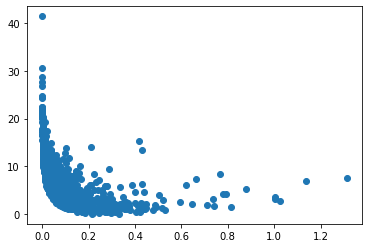

In [60]:
npts=1000
plt.scatter( sample_weights[0:npts], v_times_true_cov_inv_times_v[0:npts])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

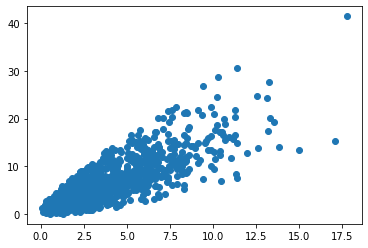

In [61]:
npts=1000
plt.scatter( v_times_train_cov_inv_times_v[0:npts], v_times_true_cov_inv_times_v[0:npts])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

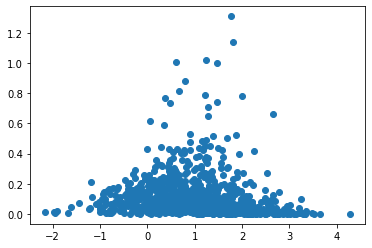

In [62]:
plt.scatter( train_pts[0:npts,0], sample_weights[0:npts])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

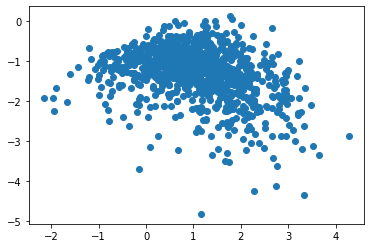

In [63]:
plt.scatter( train_pts[0:npts,0], np.log10(sample_weights[0:npts]))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

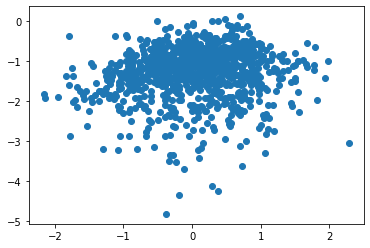

In [64]:
plt.scatter( train_pts[0:npts,1], np.log10(sample_weights[0:npts]))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

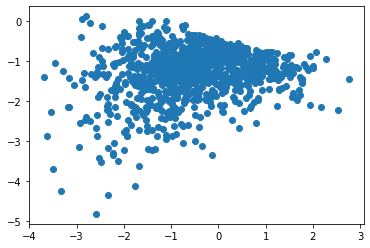

In [65]:
plt.scatter( train_pts[0:npts,2], np.log10(sample_weights[0:npts]))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

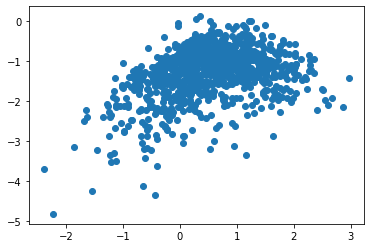

In [66]:
plt.scatter( train_pts[0:npts,3], np.log10(sample_weights[0:npts]))
plt.show

In [67]:
pdf_ratio

array([0.1999469 , 0.27912961, 0.64920312, ..., 0.37231167, 0.83208555,
       0.33986061])

In [68]:
exp_v_times_train_cov_inv_times_v

array([0.18216112, 0.26140855, 0.42680566, ..., 0.58398607, 0.67948456,
       0.35143249])

In [69]:
exp_v_times_true_cov_inv_times_v

array([0.01916077, 0.0383856 , 0.14576506, ..., 0.11438045, 0.29743375,
       0.06283266])

In [70]:
sample_weights

array([0.02269743, 0.028491  , 0.06222004, ..., 0.0362311 , 0.08268605,
       0.04356154])

<function matplotlib.pyplot.show(close=None, block=None)>

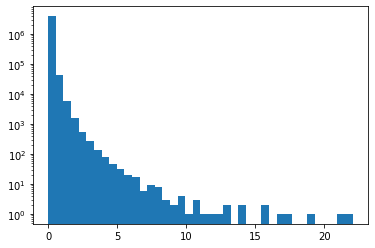

In [71]:
plt.hist(calc_weight, bins=40)
ax=plt.gca()
ax.set_yscale('log')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

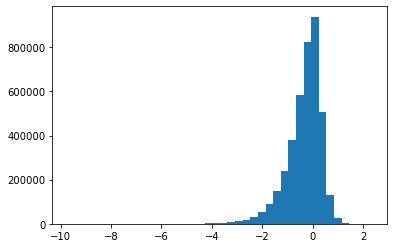

In [72]:
plt.hist( np.log10(pdf_ratio), bins=40)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

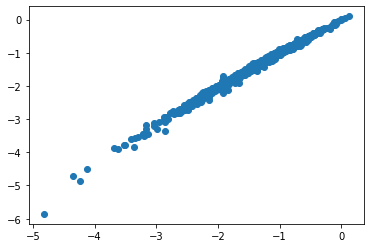

In [73]:
npts=1000
plt.scatter( np.log10(sample_weights[0:npts]), np.log10(calc_weight[0:npts]))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

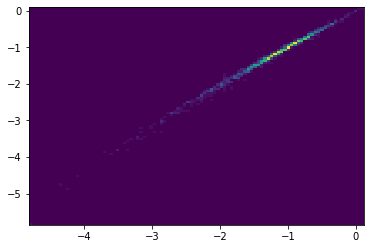

In [74]:
plt.hist2d( np.log10(sample_weights[0:npts]), np.log10(calc_weight[0:npts]), bins=[100,100])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

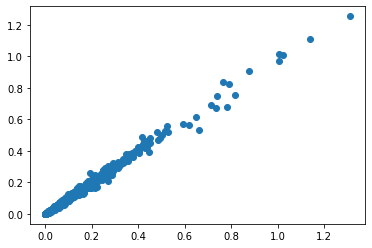

In [75]:
npts=1000
plt.scatter( (sample_weights[0:npts][sample_weights[0:npts]<100]), (calc_weight[0:npts][sample_weights[0:npts]<100]))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

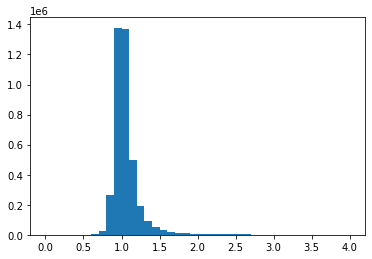

In [76]:
plt.hist( sample_weights/calc_weight, bins=40, range=[0,4])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

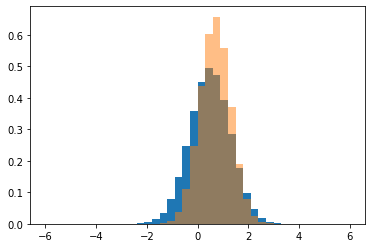

In [77]:
hbins=40
plt.hist( train_pts[:,3], bins=hbins, density=True, range=[-6,6] )
plt.hist( true_pts[:,3], bins=hbins, density=True, range=[-6,6], alpha=0.5 )
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

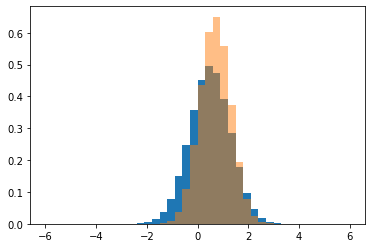

In [78]:
hbins=40
plt.hist( train_pts[:,3], bins=hbins, density=True, range=[-6,6] )
plt.hist( train_pts[:,3], weights=sample_weights, bins=hbins, density=True, range=[-6,6], alpha=0.5 )
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

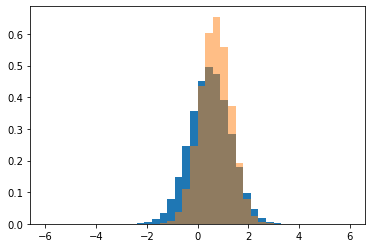

In [79]:
hbins=40
plt.hist( train_pts[:,3], bins=hbins, density=True, range=[-6,6] )
plt.hist( train_pts[:,3], weights=pdf_ratio, bins=hbins, density=True, range=[-6,6], alpha=0.5 )
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

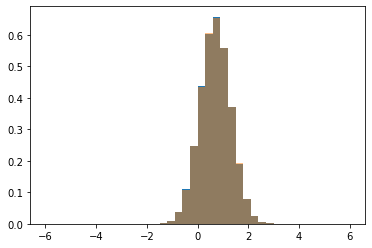

In [80]:
hbins=40
plt.hist( true_pts[:,3], bins=hbins, density=True, range=[-6,6] )
plt.hist( train_pts[:,3], weights=pdf_ratio, bins=hbins, density=True, range=[-6,6], alpha=0.5 )
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

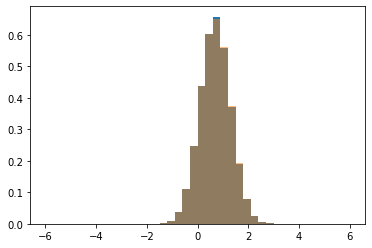

In [81]:
hbins=40
plt.hist( true_pts[:,3], bins=hbins, density=True, range=[-6,6] )
plt.hist( train_pts[:,3], weights=sample_weights, bins=hbins, density=True, range=[-6,6], alpha=0.5 )
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

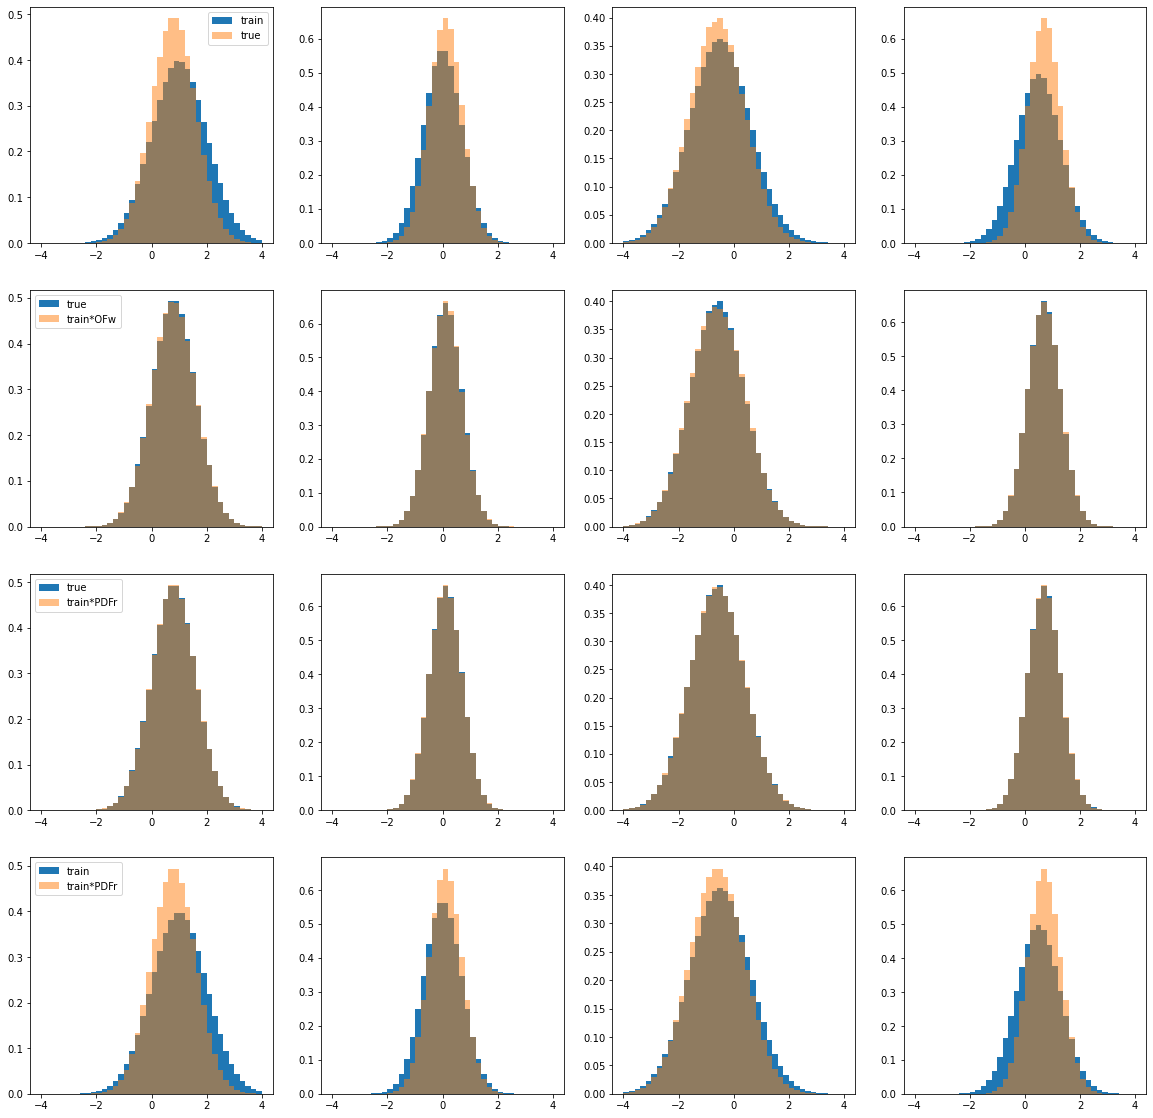

In [82]:
fig,ax = plt.subplots( 4, ndim, figsize=(5*ndim,5*4))

hbins = 40
hxmin = -4
hxmax = 4

for fi in range(ndim) :
    
    ax[0][fi].hist( train_pts[:,fi], bins=hbins, density=True, range=[hxmin,hxmax], label='train' )
    ax[0][fi].hist( true_pts[:,fi], bins=hbins, density=True, range=[hxmin,hxmax], label='true', alpha=0.5 )
    
    ax[1][fi].hist( true_pts[:,fi], bins=hbins, density=True, range=[hxmin,hxmax], label='true')
    ax[1][fi].hist( train_pts[:,fi], weights=sample_weights, bins=hbins, density=True, 
                   label='train*OFw', range=[hxmin,hxmax], alpha=0.5 )

    ax[2][fi].hist( true_pts[:,fi], bins=hbins, density=True, range=[hxmin,hxmax], label='true' )
    ax[2][fi].hist( train_pts[:,fi], weights=pdf_ratio, bins=hbins, density=True, 
                   label='train*PDFr', range=[hxmin,hxmax], alpha=0.5 )

    ax[3][fi].hist( train_pts[:,fi], bins=hbins, density=True, range=[hxmin,hxmax], label='train' )
    ax[3][fi].hist( train_pts[:,fi], weights=pdf_ratio, bins=hbins, density=True, 
                   label='train*PDFr', range=[hxmin,hxmax], alpha=0.5 )
 

    ax[0][0].legend()
    ax[1][0].legend()
    ax[2][0].legend()
    ax[3][0].legend()
    
plt.show

In [83]:
delta_weight = sample_weights - calc_weight

<function matplotlib.pyplot.show(close=None, block=None)>

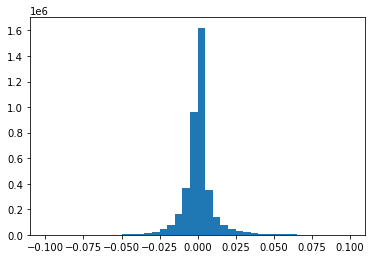

In [84]:
plt.hist( delta_weight, bins=40, range=[-0.1,0.1])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

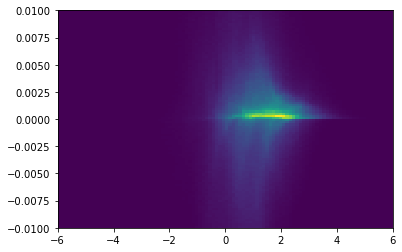

In [85]:
hbins=100
plt.hist2d( train_pts[:,0], delta_weight, bins=[hbins,hbins], range=([-6,6],[-0.01,0.01]))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

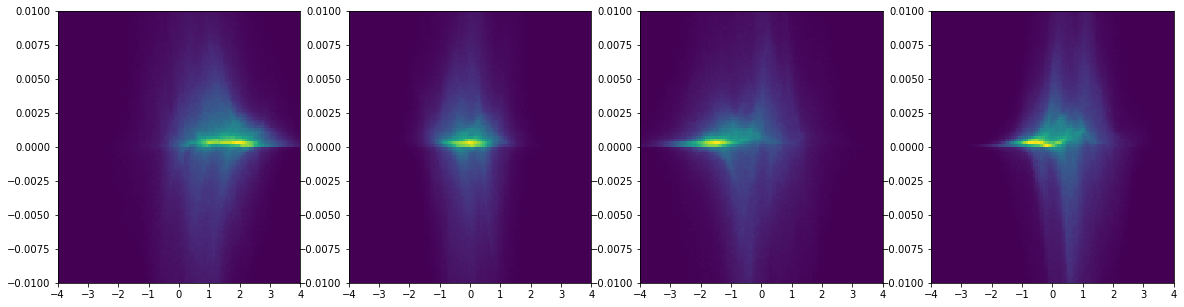

In [86]:
fig,ax = plt.subplots( 1, ndim, figsize=(ndim*5,5))

hxmin=-4
hxmax=4

hbins=100

for fi in range(ndim) :
    ax[fi].hist2d( train_pts[:,fi], delta_weight, bins=[hbins,hbins], range=([hxmin,hxmax],[-0.01,0.01]))
    
plt.show
